# Importeringar

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import keras_tuner as kt

# 1. Ladda upp datasetet och lägger en limit på 1000

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

limit = 2000
x_train = x_train[:limit]
y_train = y_train[:limit]
x_test = x_test[:limit]
y_test = y_test[:limit]

print(np.shape(x_train))
print(np.shape(y_train))

# Convert labels to categorical
y_train = to_categorical(y_train, 100)
print(np.shape(y_train))

(5000, 32, 32, 3)
(5000, 1)
(5000, 100)


# 2. Kollar vad som finns i datan

In [214]:
print(f"Antal klasser: {len(np.unique(y_train))}")

Antal klasser: 2


# 3. Normalisera datan först

In [215]:
X_train_cnn = x_train.astype('float32') / 255.0
X_test_cnn = x_test.astype('float32') / 255.0

# 4: visualisering

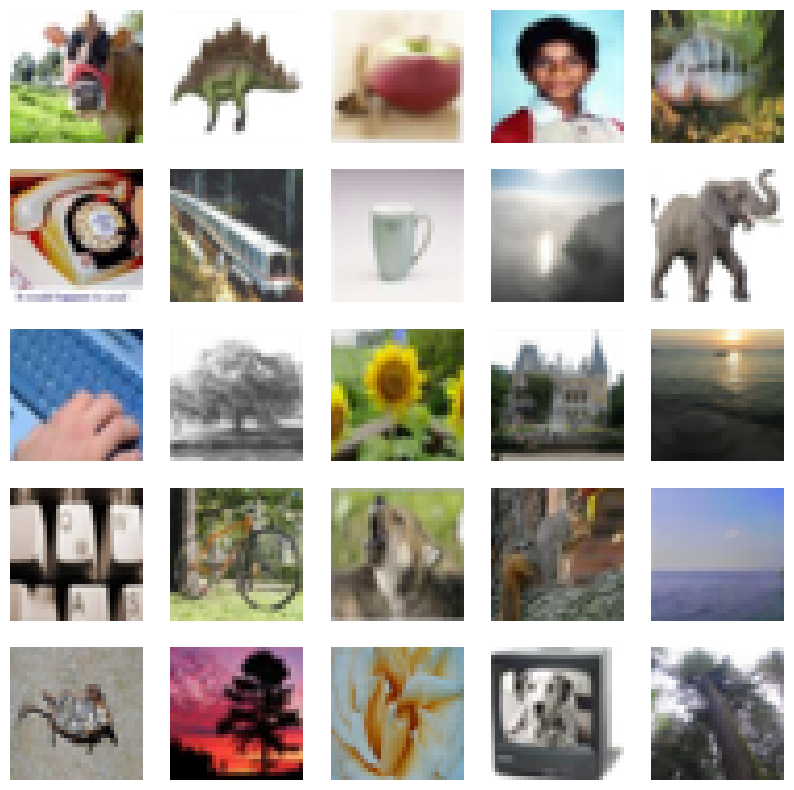

In [216]:
# Doing some plots of the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

# 5. Bygg ANN modell

In [217]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Tränar modellen
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Testar modellen
y_pred = model.predict(X_test_cnn)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy_original = np.mean(y_pred_labels == y_test.flatten())
print(f"Resultat ursprunglig CNN: {accuracy_original}")

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0084 - loss: 4.6124 - val_accuracy: 0.0140 - val_loss: 4.5828
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0163 - loss: 4.5442 - val_accuracy: 0.0230 - val_loss: 4.4321
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0253 - loss: 4.3839 - val_accuracy: 0.0300 - val_loss: 4.3438
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0380 - loss: 4.2923 - val_accuracy: 0.0400 - val_loss: 4.2157
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0525 - loss: 4.1493 - val_accuracy: 0.0560 - val_loss: 4.2106
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0588 - loss: 4.0725 - val_accuracy: 0.0670 - val_loss: 4.0802
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0816 - loss: 3.9264 - val_accuracy: 0.0680 - val_loss: 4.0094
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1022 - loss: 3.8463 - val_accuracy: 0.0840 - v

# 6. Implementerar KerasTuner för CNN


In [218]:
def build_model(hp):
    model = Sequential()
    
    # Lager 1
    filters_layer1 = hp.Int('filters_layer1', min_value=16, max_value=64, step=16)
    model.add(Conv2D(filters_layer1, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Lager 2
    filters_layer2 = hp.Int('filters_layer2', min_value=32, max_value=128, step=32)
    model.add(Conv2D(filters_layer2, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Lager 3
    filters_layer3 = hp.Int('filters_layer3', min_value=64, max_value=256, step=64)
    model.add(Conv2D(filters_layer3, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Lager 4
    filters_layer4 = hp.Int('filters_layer4', min_value=128, max_value=512, step=128)
    model.add(Conv2D(filters_layer4, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model




# 7. Startar KerasTuner

In [219]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',        
    project_name='cifar100_cnn_tuning',
    overwrite=True
)

# Kör sökningen
tuner.search(X_train_cnn, y_train, epochs=10, batch_size=64, validation_split=0.2)

best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Bästa filters lager 1: {best_hps.get('filters_layer1')}")
print(f"Bästa filters lager 2: {best_hps.get('filters_layer2')}")
print(f"Bästa filters lager 3: {best_hps.get('filters_layer3')}")
print(f"Bästa filters lager 4: {best_hps.get('filters_layer4')}")



Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.14900000393390656

Best val_accuracy So Far: 0.15299999713897705
Total elapsed time: 00h 01m 39s
Bästa filters lager 1: 32
Bästa filters lager 2: 128
Bästa filters lager 3: 192
Bästa filters lager 4: 384


# 8. Testar bästa modellen från KerasTuner


In [220]:
y_pred_tuned = best_model.predict(X_test_cnn)
y_pred_tuned_labels = np.argmax(y_pred_tuned, axis=1)
accuracy_tuned = np.mean(y_pred_tuned_labels == y_test.flatten())
print(f"Resultat KerasTuner CNN: {accuracy_tuned}")



157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Resultat KerasTuner CNN: 0.156


# 9. implementerar tranfer learning

In [221]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Ladda VGG16 utan topplagret, förtränad på ImageNet
# Vi behöver ändra storlek på bilderna eftersom VGG16 förväntar sig minst 32x32
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Fryser basmodellens lager
for layer in base_model.layers:
    layer.trainable = False

# Lägger till egna lager
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(100, activation='softmax')(x)

# Skapar modellen
transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# 10. Tränar transfer learning modellen


In [222]:
history_transfer = transfer_model.fit(X_train_cnn, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.0224 - loss: 4.6740 - val_accuracy: 0.0940 - val_loss: 4.2686
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.1147 - loss: 4.0939 - val_accuracy: 0.1390 - val_loss: 3.8452
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.1554 - loss: 3.7050 - val_accuracy: 0.1690 - val_loss: 3.6335
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.1894 - loss: 3.4011 - val_accuracy: 0.1640 - val_loss: 3.5124
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.2139 - loss: 3.2489 - val_accuracy: 0.1770 - val_loss: 3.4207
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.2467 - loss: 3.1264 - val_accuracy: 0.1980 - val_loss: 3.3541
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.2631 - loss: 3.0108 - val_accuracy: 0.2030 - val_loss: 3.2955
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.2928 - loss: 2.8564 - val_accuracy: 0.

# 11. Testar transfer learning modellen


In [223]:
y_pred_transfer = transfer_model.predict(X_test_cnn)
y_pred_transfer_labels = np.argmax(y_pred_transfer, axis=1)
accuracy_transfer = np.mean(y_pred_transfer_labels == y_test.flatten())
print(f"Resultat Transfer Learning: {accuracy_transfer}")

# Jämförelse av alla modeller
print("\nJämförelse:")
print(f"Ursprunglig CNN: {accuracy_original}")
print(f"KerasTuner CNN: {accuracy_tuned}")
print(f"Transfer Learning: {accuracy_transfer}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step
Resultat Transfer Learning: 0.2368

Jämförelse:
Ursprunglig CNN: 0.1248
KerasTuner CNN: 0.156
Transfer Learning: 0.2368
